<a href="https://colab.research.google.com/github/Santoshsai007/Santoshsai007/blob/main/JOB_A_THON_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement

Predicting Employee Attrition    

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not

In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dftrain=pd.read_csv("/content/drive/MyDrive/job_a_thon_nov_2021.csv")

In [4]:
dftrain.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


There are missing values in LastWorkingDate Column we need to figureout how deal those missing values

In [6]:
dftrain["Emp_ID"].nunique()

2381

I observed one thing that actually there are only 2314 unique employees they are reported more than one time and employeed id's associated with test also included in dataset.

In [7]:
dftest=pd.read_csv("/content/drive/MyDrive/job_a_thon_test.csv")

In [8]:
dftest.shape

(741, 1)

In [9]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


The test datset having unique employee id's those we need to predict so we have to join associated information from train datset later.

In [10]:
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Emp_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19104.0,34.650283,6.264471e+00,21.0,30.0,34.0,39.0,58.0
Salary,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Designation,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


## For Understanding Data Ditribution among Gender

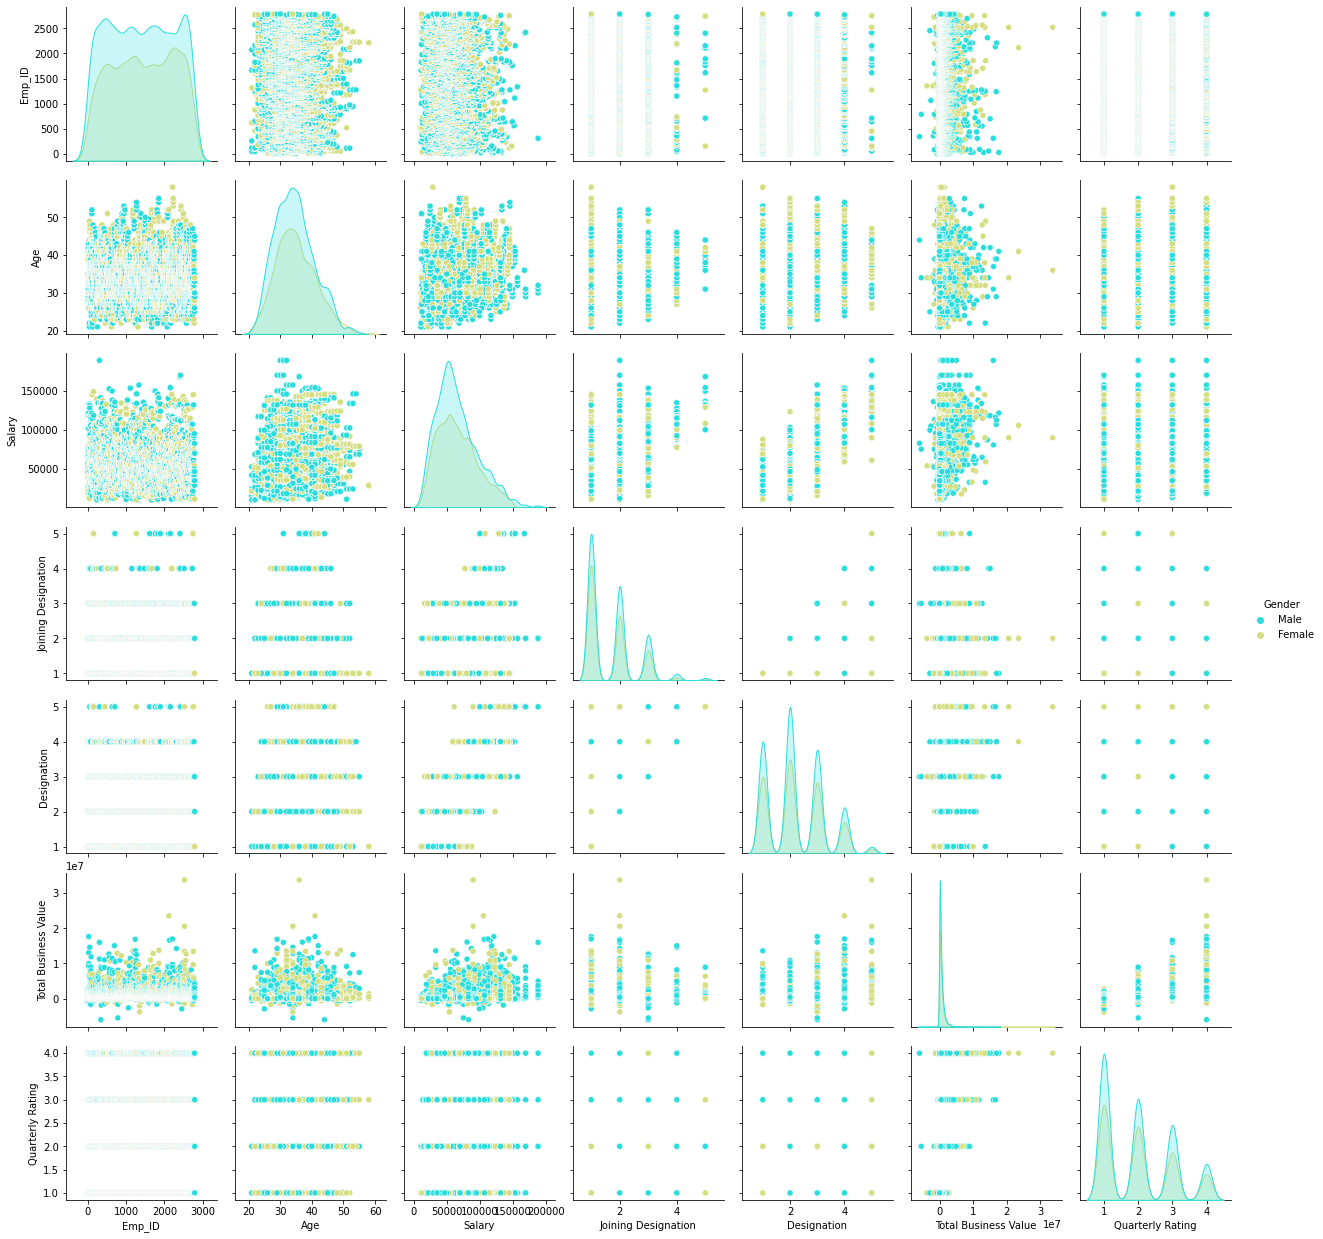

In [11]:
sns.pairplot(dftrain,hue='Gender',palette='rainbow')

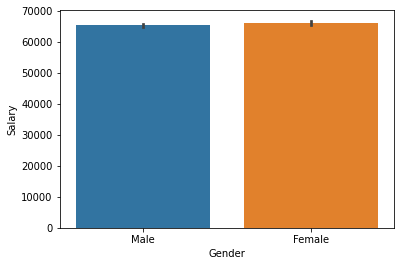

In [12]:
sns.barplot(x="Gender",y="Salary",data=dftrain)

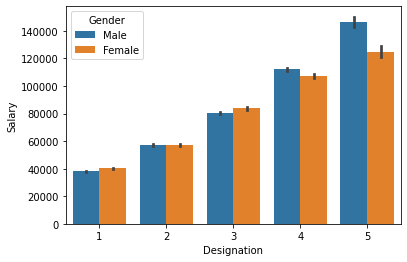

In [13]:
sns.barplot(x="Designation",y="Salary",data=dftrain,hue="Gender")

We can clearly observe that there is a difference b/w avg salaries of different designation and not much difference in Gender wise

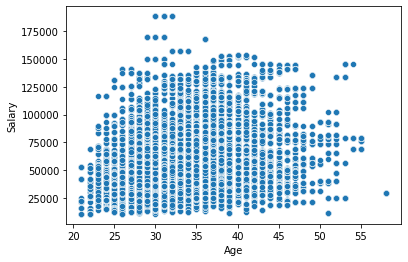

In [14]:
sns.scatterplot(x="Age",y="Salary",data=dftrain)

In [15]:
#There is no such linear relation ship b/w age and salary

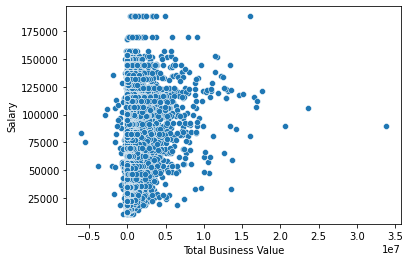

In [16]:
sns.scatterplot(x="Total Business Value",y="Salary",data=dftrain)

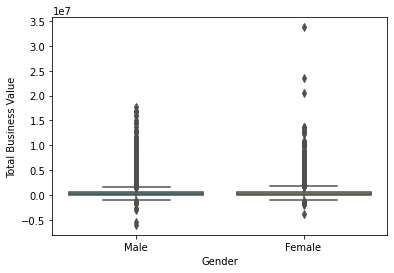

In [17]:
sns.boxplot(x="Gender", y="Total Business Value", data=dftrain,palette='rainbow')


In [18]:
#we found outliers in Total Business Value Column

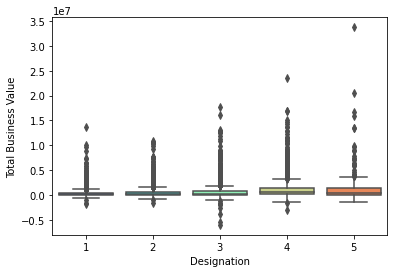

In [19]:
sns.boxplot(x="Designation", y="Total Business Value", data=dftrain,palette='rainbow')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


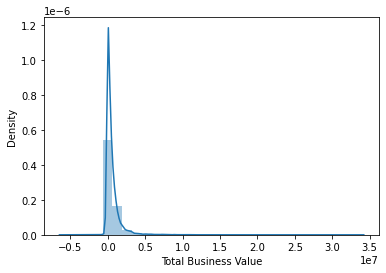

In [20]:
sns.distplot(dftrain["Total Business Value"],bins=30)


In [21]:
#we can see clearly our data is not following Normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


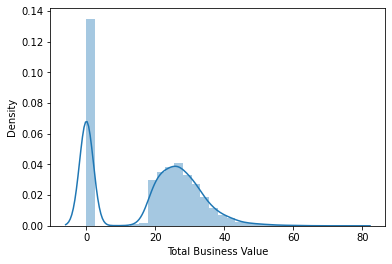

In [22]:
sns.distplot(np.power(dftrain["Total Business Value"],1/4),bins=30)


now our data looks closer to normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


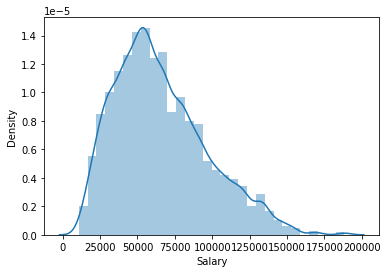

In [23]:
sns.distplot(dftrain["Salary"],bins=30)


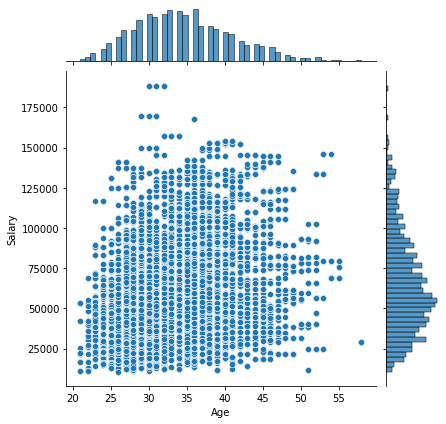

In [24]:
sns.jointplot(x="Age",y="Salary",data=dftrain,kind="scatter")

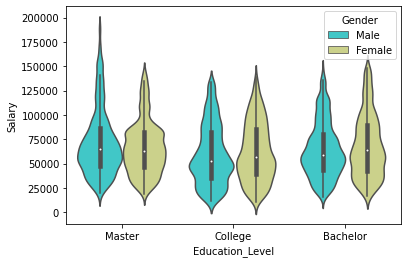

In [25]:
sns.violinplot(x="Education_Level", y="Salary",hue="Gender", data=dftrain,palette='rainbow')

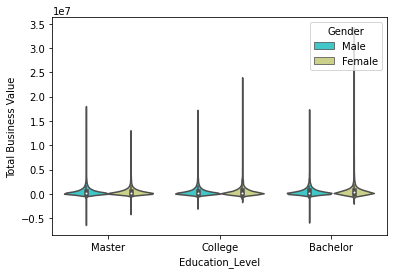

In [26]:
sns.violinplot(x="Education_Level", y="Total Business Value",hue="Gender", data=dftrain,palette='rainbow')

#Hypothesis Tesing

In [27]:
#Testing Hypothesis by conducting t-test
#Null(H0): Average Monthly Salary of Gender are equal
#Alternate(H1): Average Monthly Salary of Gender are not equal
Male=dftrain[dftrain.Gender=="Male"]
Female=dftrain[dftrain.Gender=="Female"]
from scipy.stats import ttest_ind
ttest_ind(Male.Salary,Female.Salary,equal_var=False)

Ttest_indResult(statistic=-1.8406083226609546, pvalue=0.06569577396151297)

In [28]:
#p-value is greater than 0.06 there is not enough evidence to reject the null hypothesis at alpha=0.05

In [29]:
#Conducting Anova single factor test to check the Hypohesis
from scipy.stats import f_oneway
#null: avg salary of different education level are equal
#alternate: avg salary of different education level are not equal
master=dftrain[dftrain.Education_Level=="Master"]
college=dftrain[dftrain.Education_Level=="College"]
school=dftrain[dftrain.Education_Level=="Bachelor"]
f_oneway(master.Salary,college.Salary,school.Salary)

F_onewayResult(statistic=131.7659974098654, pvalue=1.4652854637087227e-57)

In [30]:
#p value is lessthan 0.05 so we are rejecting the null hypothesis at alpha=0.05

In [31]:
dftrain.corr()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
Emp_ID,1.000000,0.006652,-0.035767,-0.035166,-0.025712,0.003896,0.017917
Age,0.006652,1.000000,0.192225,-0.005726,0.211515,0.109426,0.172660
Salary,-0.035767,0.192225,1.000000,0.380878,0.778383,0.234044,0.116897
Joining Designation,-0.035166,-0.005726,0.380878,1.000000,0.559854,-0.044446,-0.237791
Designation,-0.025712,0.211515,0.778383,0.559854,1.000000,0.220955,0.014445
Total Business Value,0.003896,0.109426,0.234044,-0.044446,0.220955,1.000000,0.471224
Quarterly Rating,0.017917,0.172660,0.116897,-0.237791,0.014445,0.471224,1.000000


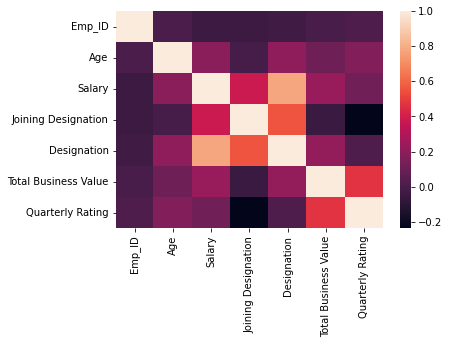

In [32]:
#plotting correlation in heatmap
sns.heatmap(dftrain.corr())

#Data-Preprocessing

In the DataFrame Employeed id's are reported morethan once  so by using groupby aggregating in way that they represent all the information

In [33]:
check1=dftrain[dftrain["LastWorkingDate"].notnull()]

In [34]:
check3=dftrain.groupby("Emp_ID")["Total Business Value"].sum()

In [35]:
check4=dftrain.groupby("Emp_ID")["Quarterly Rating"].sum().reset_index(name="rating")

In [36]:
x=dftrain["Emp_ID"].value_counts()

In [37]:
x.index=x.index.set_names("Emp_ID")

In [38]:
x=x.reset_index(name="count")

In [39]:
check3=check3.reset_index()

In [40]:
check3=check3.join(x.set_index("Emp_ID"),on="Emp_ID")

In [41]:
check5=check3.join(check4.set_index("Emp_ID"),on="Emp_ID")

In [42]:
check5["Avg_Quarterly Rating"]=check5["rating"]/check5["count"]

In [43]:
check6=check5.drop(["rating","count"],axis=1)

In [44]:
check6.rename(columns={"Total Business Value":"Total_Business_Value"},inplace=True)

In [45]:
dftrain1=dftrain.drop_duplicates(subset=["Emp_ID"],keep='last')

In [46]:
dftrain1.shape

(2381, 13)

In [47]:
check7=check6.join(dftrain1.set_index("Emp_ID"),on="Emp_ID")

In [48]:
check7.head()

,Emp_ID,Total_Business_Value,Avg_Quarterly Rating,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,1,1715580,2.0,2016-03-01,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
1,2,0,1.0,2017-12-01,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
2,4,350000,1.0,2017-04-01,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
3,5,120360,1.0,2016-03-01,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
4,6,1265000,1.6,2017-12-01,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2


#Feature Engineering/Feature Selection

*Reoving irrelavent features\
*Extracting useful features from our data\
*Creating Growth and lastworkingday yes/no columns

In [49]:
check7["LastWorkingDate"].notnull().sum()

1616

In [50]:
check8=check7.drop(["Total Business Value","Quarterly Rating","MMM-YY"],axis=1)

In [51]:
check8["LastWorkingDate"]=np.where(check7["LastWorkingDate"].notnull(),1,0)

In [52]:
check8.head()

,Emp_ID,Total_Business_Value,Avg_Quarterly Rating,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation
0,1,1715580,2.0,28,Male,C23,Master,57387,2015-12-24,1,1,1
1,2,0,1.0,31,Male,C7,Master,67016,2017-11-06,0,2,2
2,4,350000,1.0,43,Male,C13,Master,65603,2016-12-07,1,2,2
3,5,120360,1.0,29,Male,C9,College,46368,2016-01-09,1,1,1
4,6,1265000,1.6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3


In [53]:
check8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Total_Business_Value  2381 non-null   int64  
 2   Avg_Quarterly Rating  2381 non-null   float64
 3   Age                   2381 non-null   int64  
 4   Gender                2381 non-null   object 
 5   City                  2381 non-null   object 
 6   Education_Level       2381 non-null   object 
 7   Salary                2381 non-null   int64  
 8   Dateofjoining         2381 non-null   object 
 9   LastWorkingDate       2381 non-null   int64  
 10  Joining Designation   2381 non-null   int64  
 11  Designation           2381 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 223.3+ KB


In [54]:
check8['Dateofjoining'] =  pd.to_datetime(check8['Dateofjoining'], infer_datetime_format=True)

In [55]:
check8["Growth"]=check8["Designation"]-check8["Joining Designation"]

In [56]:
check8.head()

,Emp_ID,Total_Business_Value,Avg_Quarterly Rating,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Growth
0,1,1715580,2.0,28,Male,C23,Master,57387,2015-12-24,1,1,1,0
1,2,0,1.0,31,Male,C7,Master,67016,2017-11-06,0,2,2,0
2,4,350000,1.0,43,Male,C13,Master,65603,2016-12-07,1,2,2,0
3,5,120360,1.0,29,Male,C9,College,46368,2016-01-09,1,1,1,0
4,6,1265000,1.6,31,Female,C11,Bachelor,78728,2017-07-31,0,3,3,0


In [57]:
check9=check8.drop(["Dateofjoining"],axis=1)

In [58]:
check9.head()

,Emp_ID,Total_Business_Value,Avg_Quarterly Rating,Age,Gender,City,Education_Level,Salary,LastWorkingDate,Joining Designation,Designation,Growth
0,1,1715580,2.0,28,Male,C23,Master,57387,1,1,1,0
1,2,0,1.0,31,Male,C7,Master,67016,0,2,2,0
2,4,350000,1.0,43,Male,C13,Master,65603,1,2,2,0
3,5,120360,1.0,29,Male,C9,College,46368,1,1,1,0
4,6,1265000,1.6,31,Female,C11,Bachelor,78728,0,3,3,0


#LabelEncoding and Dummy Encoding of Features

LabelEncoding the ordinal data columns like Education_Level\
DummyEncoding the nominal data columns like Gender and City

In [59]:
check9.City.nunique()

29

In [60]:
check10_dummy=check9[["Gender","City"]]

In [61]:
check10_dummy=pd.get_dummies(check10_dummy)

In [62]:
check10_dummy.head()

,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
scale_mapper={"Master":3,"Bachelor":2,"College":1}
check11_Label=check9["Education_Level"]
check11_Label=check11_Label.replace(scale_mapper)
check11_Label=pd.DataFrame(check11_Label,columns=["Education_Level"])
check9["Education_Level"]=check11_Label
check9["Education_Level"].head()


0    3
1    3
2    3
3    1
4    2
Name: Education_Level, dtype: int64

#Scaling Data

 Scaling the data by using min-max scalar because before using kmeans clustering algorithm we should scale the data

In [64]:
check11_scale=check9.drop(["Gender","City"],axis=1)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
mm=MinMaxScaler()

In [67]:
check11_scale_=mm.fit_transform(check11_scale)

In [68]:
check11_scale_=pd.DataFrame(check11_scale_,columns=check11_scale.columns)

In [69]:
check11_scale_

,Emp_ID,Total_Business_Value,Avg_Quarterly Rating,Age,Education_Level,Salary,LastWorkingDate,Joining Designation,Designation,Growth
0,0.000000,0.032064,0.333333,0.189189,1.0,0.262508,1.0,0.00,0.00,0.00
1,0.000359,0.014326,0.000000,0.270270,1.0,0.316703,0.0,0.25,0.25,0.00
2,0.001076,0.017944,0.000000,0.594595,1.0,0.308750,1.0,0.25,0.25,0.00
3,0.001435,0.015570,0.000000,0.216216,0.0,0.200489,1.0,0.00,0.00,0.00
4,0.001794,0.027405,0.200000,0.270270,0.5,0.382623,0.0,0.50,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...
2376,0.998565,0.239197,0.541667,0.351351,0.0,0.405626,0.0,0.25,0.50,0.25
2377,0.998924,0.014326,0.000000,0.351351,0.0,0.007643,1.0,0.00,0.00,0.00
2378,0.999282,0.043432,0.222222,0.648649,0.0,0.138588,1.0,0.25,0.25,0.00
2379,0.999641,0.024436,0.166667,0.189189,1.0,0.330673,1.0,0.00,0.00,0.00


In [70]:
combinedf=pd.concat([check10_dummy,check11_scale_],axis=1)

In [71]:
xy=combinedf

In [72]:
combinedf=combinedf.drop("Emp_ID",axis=1)

In [73]:
combinedf.head()

,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Total_Business_Value,Avg_Quarterly Rating,Age,Education_Level,Salary,LastWorkingDate,Joining Designation,Designation,Growth
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.032064,0.333333,0.189189,1.0,0.262508,1.0,0.00,0.00,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.014326,0.000000,0.270270,1.0,0.316703,0.0,0.25,0.25,0.0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.017944,0.000000,0.594595,1.0,0.308750,1.0,0.25,0.25,0.0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.015570,0.000000,0.216216,0.0,0.200489,1.0,0.00,0.00,0.0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.027405,0.200000,0.270270,0.5,0.382623,0.0,0.50,0.50,0.0


#Using Unsupervised Learning to Identify and Separate Two Clusters in our Data

Kmeans clustering

In [74]:
from sklearn.cluster import KMeans

In [75]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 30)

In [76]:
k_means.fit(combinedf)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 1 0]


In [77]:
labels.shape

(2381,)

In [78]:
check9["labels"]=labels

In [79]:
check9.labels.value_counts()

0    1404
1     977
Name: labels, dtype: int64

#Model Evaluation and Visualization of results

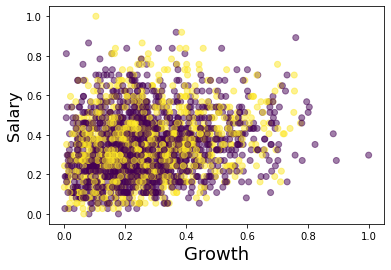

In [80]:
plt.scatter(xy["Salary"], xy["Age"], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Growth', fontsize=18)
plt.ylabel('Salary', fontsize=16)

plt.show()

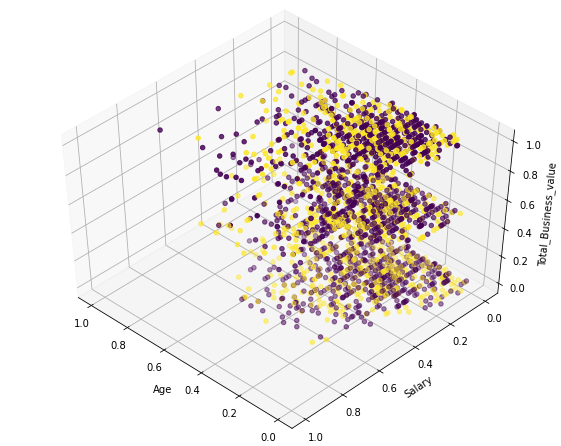

In [81]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Salary', fontsize=16)
# plt.zlabel('Total_Business_value', fontsize=16)
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel("Total_Business_value")

ax.scatter(combinedf["Age"], combinedf["Salary"], combinedf["Education_Level"], c= labels.astype(np.float))


In [82]:
from sklearn.metrics import silhouette_score

In [83]:
silhouette_score(combinedf,labels)

0.22225548775844872

In [84]:
prediction=dftest.join(check9.set_index("Emp_ID"),on="Emp_ID")

In [85]:
prediction_kmean=prediction[["Emp_ID","labels"]]

In [86]:
prediction_kmean["labels"].value_counts()

0    440
1    301
Name: labels, dtype: int64

In [87]:
prediction_kmean.to_csv("job1.csv",index=False)

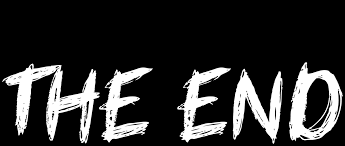